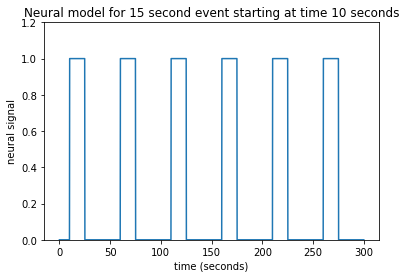

In [5]:
# import numpy as np
import matplotlib.pyplot as plt
import numpy as np
times = np.arange(0, 300, 0.1)
n_time_points = len(times)
neural_signal = np.zeros(n_time_points)
vals = [100,600,1100,1600,2100,2600]
#vals = slice(0,2500,500)
neural_signal[vals] = 1
vals2 = []
for i in vals:
    vals2.append(i + 150)
neural_signal[vals2] = -1   
neural_signal = np.cumsum(neural_signal)
plt.plot(times, neural_signal)
plt.xlabel('time (seconds)')
plt.ylabel('neural signal')
plt.ylim(0, 1.2)
plt.title("Neural model for 15 second event starting at time 10 seconds")
#show()

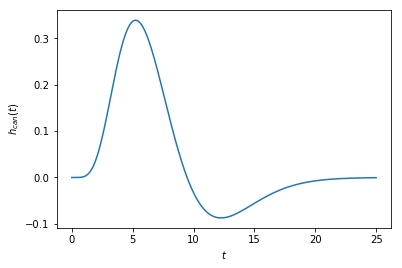

In [92]:
import nipy

from nipy.modalities.fmri import hrf, utils
import matplotlib.pyplot as plt

hrf_func = utils.lambdify_t(hrf.glover(utils.T))
t = np.linspace(0,25,200)
plt.plot(t, hrf_func(t))
a=plt.gca()
a.set_xlabel(r'$t$')
a.set_ylabel(r'$h_{can}(t)$')
show()

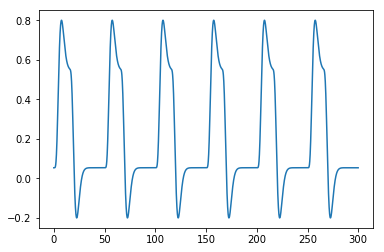

In [59]:
from scipy import signal
filtered = signal.convolve(neural_signal, hrf_func(t), mode='same')
normalized = (filtered-min(filtered))/(max(filtered)-min(filtered))
normalized = normalized - 0.2
plt.plot(times,normalized)
show()

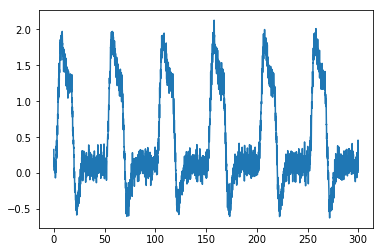

In [69]:
noise = np.random.normal(0, .1, len(times))
plt.plot(times, (normalized*2.3)+noise)
show()